## The Titanic's Passengers: A Story Told Through Data

### Titanic Survival Analysis: Exploring Factors of Survival

An Exploratory Data Analysis (EDA) notebook analyzing the Titanic passenger dataset. The notebook investigates various factors that influenced survival rates, including age, sex, passenger class, and fare. Visualizations and interpretations are provided to understand the trends and disparities in survival.

In [101]:
# Import the pandas library for data manipulation and analysis.
import pandas as pd

# Import the scipy library, specifically the stats module, which contains the Box-Cox transformation function.
from scipy import stats

# Import the seaborn library for creating statistical graphics.
import seaborn as sns 
# Import the matplotlib.pyplot library for general plotting functionalities.
import matplotlib.pyplot as plt

# Load the Titanic dataset from a CSV file into a pandas DataFrame
titanic_df = pd.read_csv("Titanic.csv")

# Display the first few rows of the DataFrame to get a preliminary look at the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
# Retrieves the names of all the columns present in the titanic_df DataFrame.
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [103]:
# get the number of missing data points per column
missing_values_count = titanic_df.isnull().sum()

# Look at the number of missing points per column
missing_values_count

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
# Checks for duplicate rows within the titanic_df DataFrame.
duplicate_data = titanic_df[titanic_df.duplicated()] 

duplicate_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [105]:
# Print a summary of the Titanic DataFrame, including data types and missing values.
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# Survival Analysis

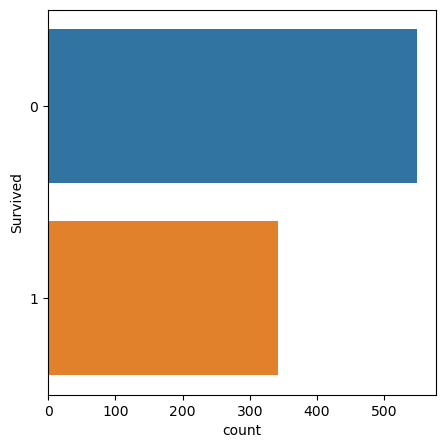

In [107]:
# Create a figure object with specified width and height
fig = plt.figure(figsize=(5,5))
# Create a countplot of the 'Survived' column
sns.countplot(y=titanic_df['Survived'], data=titanic_df);

In [108]:
# Count the number of passengers who survived
survived = titanic_df.Survived[titanic_df['Survived'] == 1].count()
# Count the number of passengers who did not survive
no_survived = titanic_df.Survived[titanic_df['Survived'] == 0].count()

print( 'Survived =',survived, 'Not survived =',no_survived)

Survived = 342 Not survived = 549


### *Interpretation:* 

This section analyzes the overall survival rate.  

The countplot and printed numbers show the distribution of passengers who survived versus those who didn't.  

This provides a baseline understanding of the dataset's target variable.


# Age Analysis

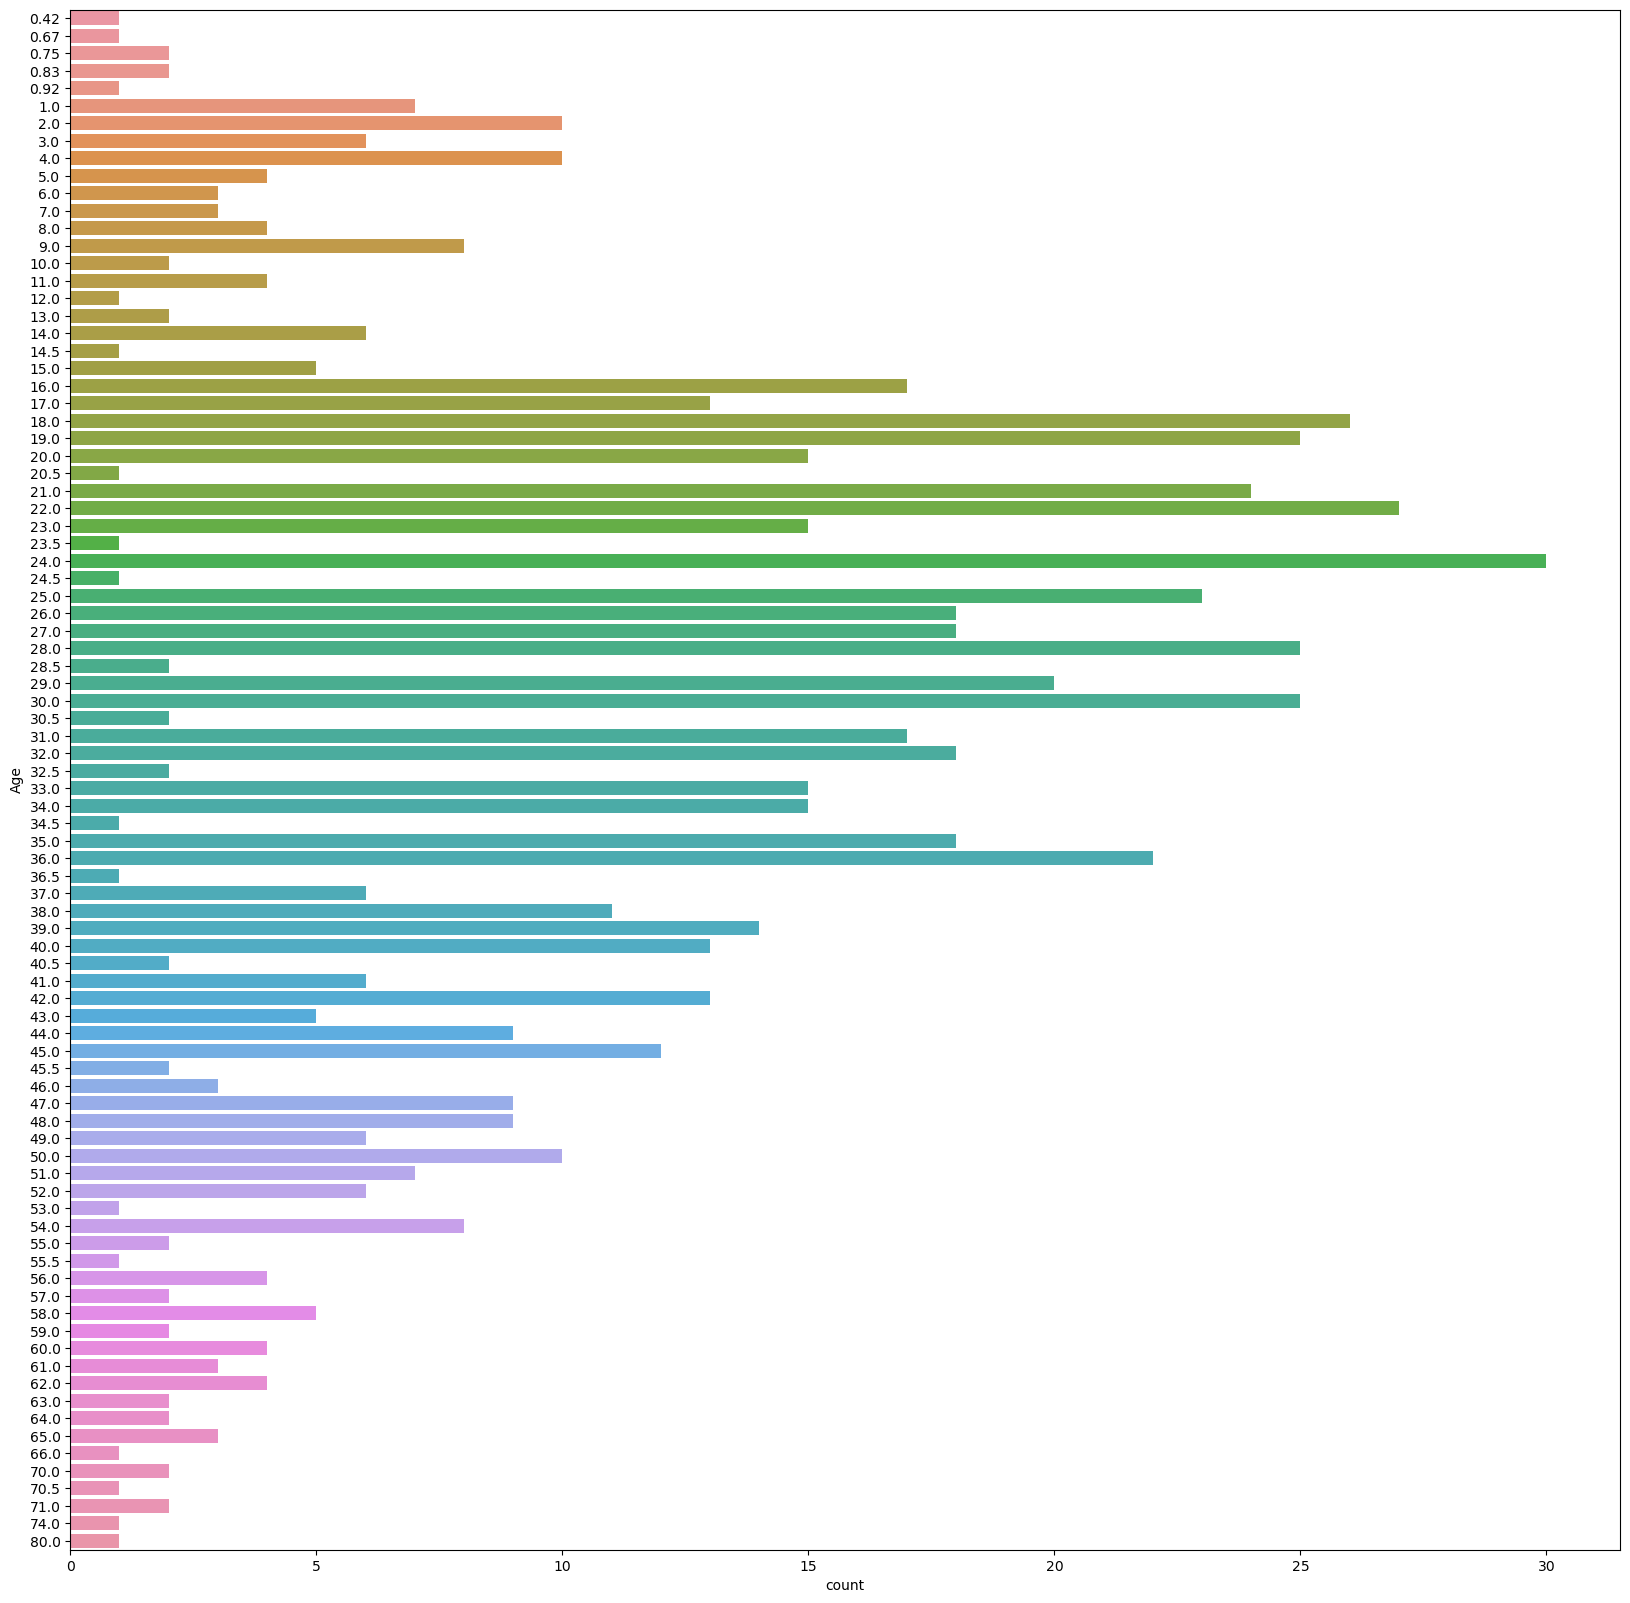

In [111]:
# Create a figure object with a specified size (20x20 inches)
fig = plt.figure(figsize=(20,20))
# Create a countplot of the 'Age' column on the y-axis
sns.countplot(y=titanic_df['Age'], data=titanic_df);

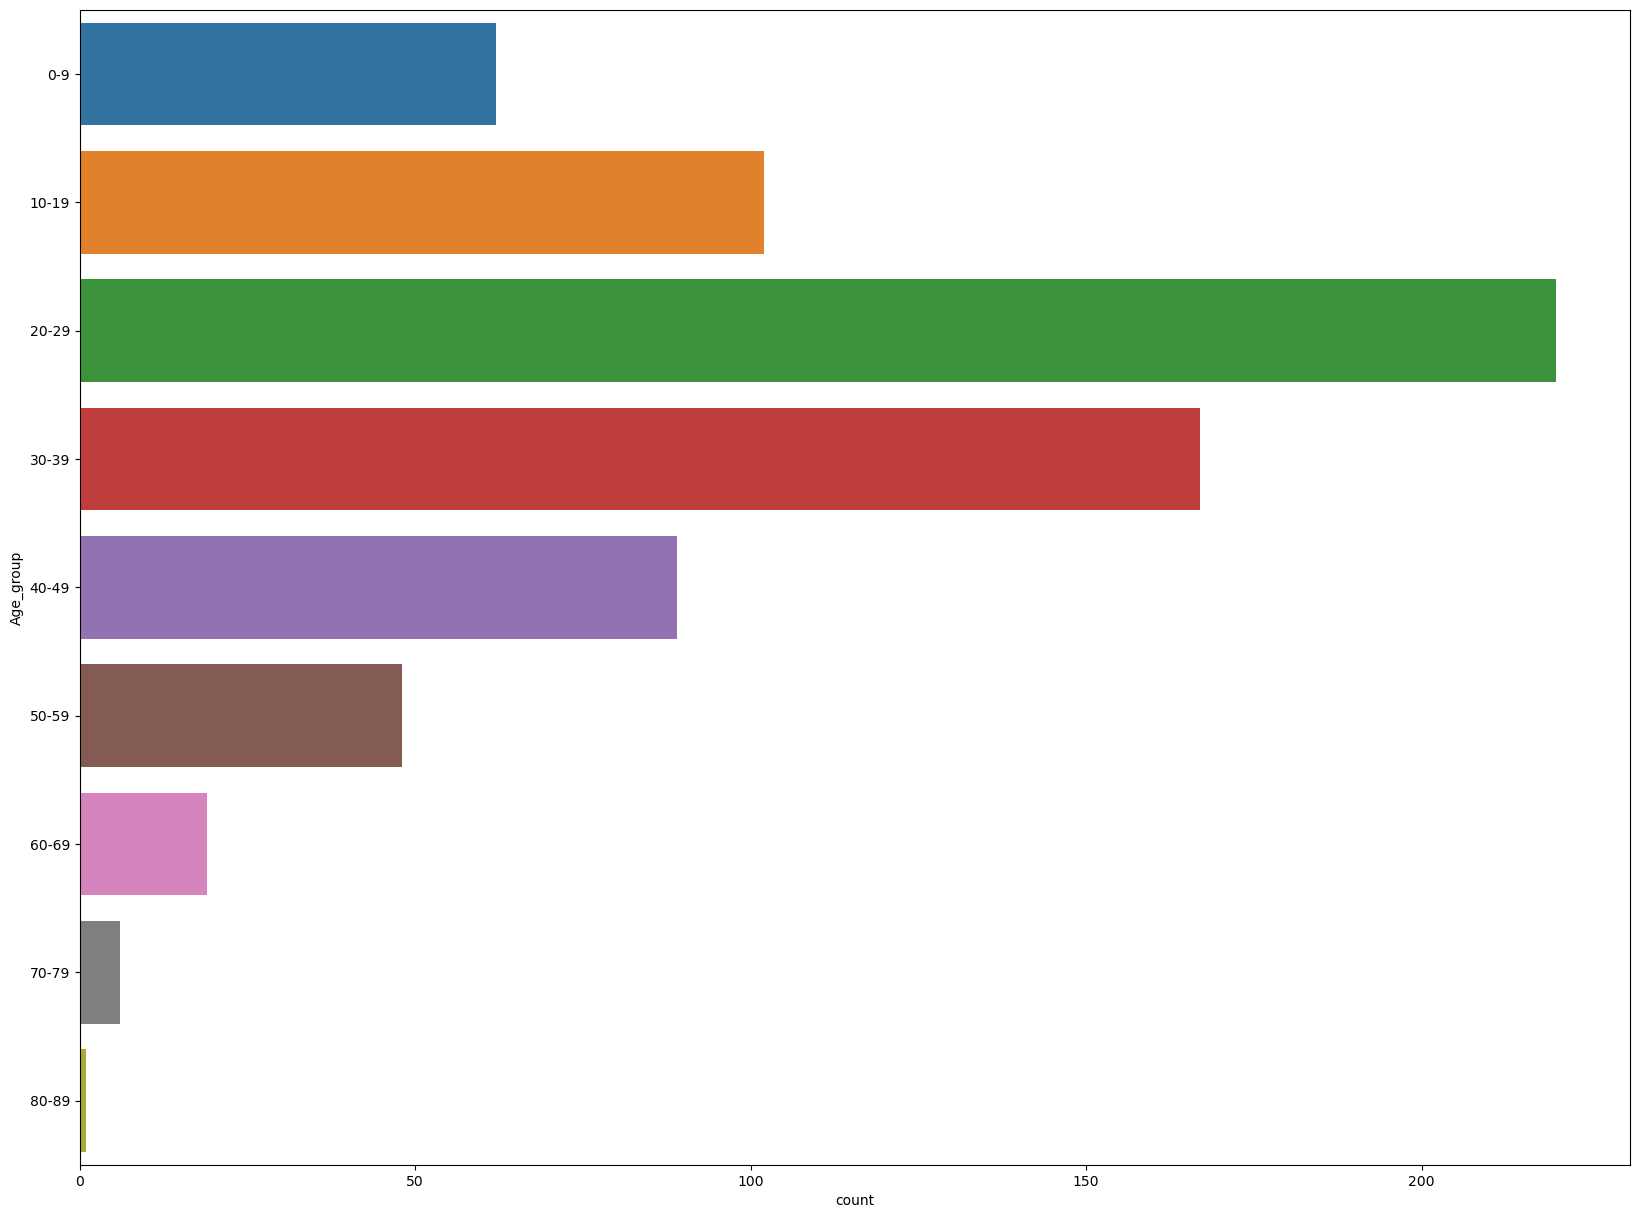

In [112]:
# Create age groups using pd.cut()
titanic_df['Age_group'] = pd.cut(titanic_df['Age'], 
                                [0, 9, 19, 29, 39, 49, 59, 69, 79, 89], 
                                labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'])

# Create a figure object with a specified size
fig = plt.figure(figsize=(20, 15)) 

# Create a countplot of the 'Age_group' column
sns.countplot(y=titanic_df['Age_group'], data=titanic_df);

In [113]:
# Group the DataFrame by 'Age_group' and sum the 'Survived' column for each group
survived_age = titanic_df.groupby('Age_group')['Survived'].sum()

# Print the results
print(survived_age)

Age_group
0-9      38
10-19    41
20-29    77
30-39    73
40-49    34
50-59    20
60-69     6
70-79     0
80-89     1
Name: Survived, dtype: int64


In [114]:
# Group by 'Age Group', 'Sex' and sum the 'Survived' column
age_sex_survived = titanic_df.groupby(['Age_group', 'Sex'])['Survived'].sum().reset_index(name='Survived_Count')

# Print the grouped results
print(age_sex_survived)

   Age_group     Sex  Survived_Count
0        0-9  female              19
1        0-9    male              19
2      10-19  female              34
3      10-19    male               7
4      20-29  female              52
5      20-29    male              25
6      30-39  female              50
7      30-39    male              23
8      40-49  female              22
9      40-49    male              12
10     50-59  female              16
11     50-59    male               4
12     60-69  female               4
13     60-69    male               2
14     70-79  female               0
15     70-79    male               0
16     80-89  female               0
17     80-89    male               1


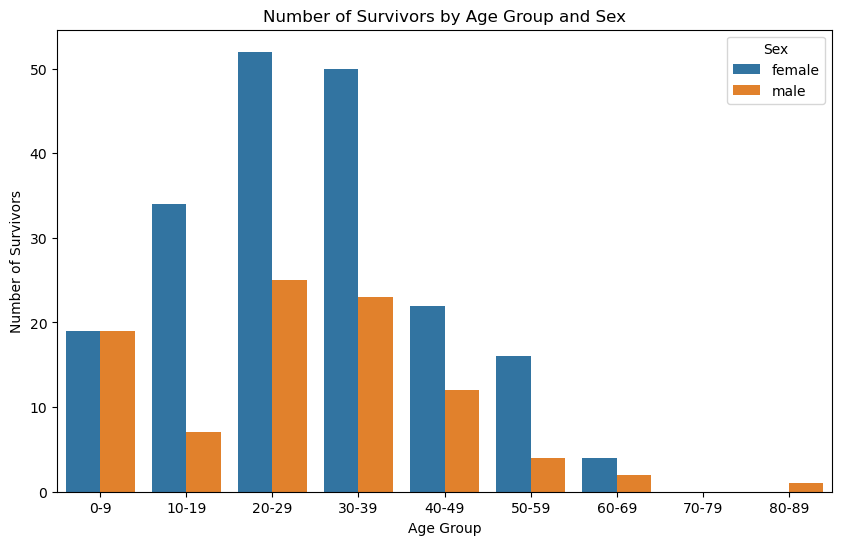

In [115]:
# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Age_group', y='Survived_Count', hue='Sex', data=age_sex_survived)

# Customize the plot
plt.title('Number of Survivors by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')
plt.legend(title='Sex', loc='upper right')  # Adjust legend position if needed

# Show the plot
plt.show()

### Number of Survivors by Age Group and Sex Plot Explanation:
Women survived at much higher rates than men across all ages.
Children also had better survival chances, especially girls.
The 20-29 and 30-39 age groups had the most survivors overall (likely due to higher initial passenger numbers in those groups).
Elderly survival was very low for both sexes.

Essentially, being female and/or a child significantly increased survival odds.  

The chart highlights the tragic male mortality and the "women and children first" protocol's impact.

### *Interpretation:* 

This section explores the relationship between age and survival.

The age distribution plot shows the frequency of different ages. Creating age groups simplifies the analysis. 

The bar plot of survival by age group and sex then allows for a more granular analysis, revealing potential differences in survival rates between age groups and genders.  

Created the `age_sex_survived` dataframe to correctly pass the data to `seaborn`.

# Analysis by Sex

In [119]:
# Survival by Sex (Pivot Table)
pivot_table = pd.pivot_table(titanic_df, index='Age_group', columns='Sex', aggfunc='size', fill_value=0)
print(pivot_table)

Sex        female  male
Age_group              
0-9            30    32
10-19          45    57
20-29          72   148
30-39          60   107
40-49          32    57
50-59          18    30
60-69           4    15
70-79           0     6
80-89           0     1


In [120]:
# Group the DataFrame by 'Sex' and calculate the sum of 'Survived' for each group
survived_sex = titanic_df.groupby('Sex')['Survived'].sum()

# Print the results
print(survived_sex)

Sex
female    233
male      109
Name: Survived, dtype: int64


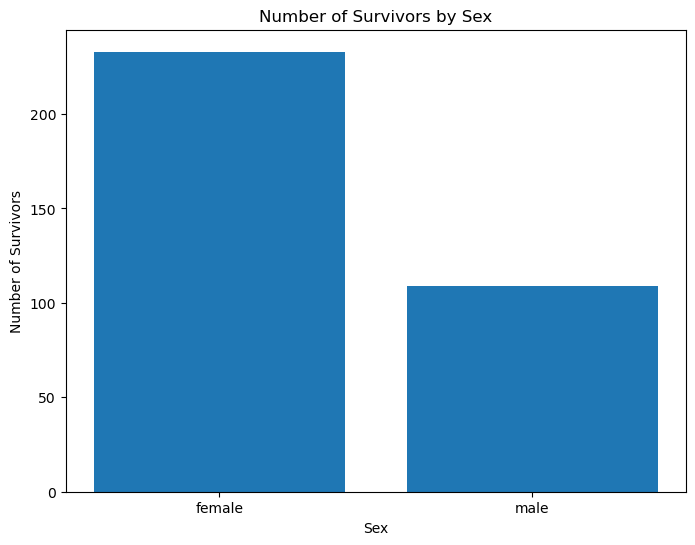

In [121]:
# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(survived_sex.index, survived_sex.values)

# Customize the plot
plt.title('Number of Survivors by Sex')
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# Show the plot
plt.show()

### *Interpretation:* 

This section examines the impact of sex on survival.  

The pivot table shows the distribution of passengers by age group and sex. 

The bar chart directly visualizes the total number of survivors for each sex.  

This often reveals significant differences in survival rates between males and females.


# Passenger Class (Pclass) Analysis

In [124]:
# Group the DataFrame by 'Pclass' and calculate the sum of 'Survived' for each group
survived_pclass = titanic_df.groupby('Pclass')['Survived'].sum()

# Print the results
print(survived_pclass)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [125]:
# Group by 'Pclass', 'Sex' and sum the 'Survived' column
class_sex_survived = titanic_df.groupby(['Pclass', 'Sex'])['Survived'].sum().reset_index(name='Survived_Count_Class')

# Print the grouped results
print(class_sex_survived)

   Pclass     Sex  Survived_Count_Class
0       1  female                    91
1       1    male                    45
2       2  female                    70
3       2    male                    17
4       3  female                    72
5       3    male                    47


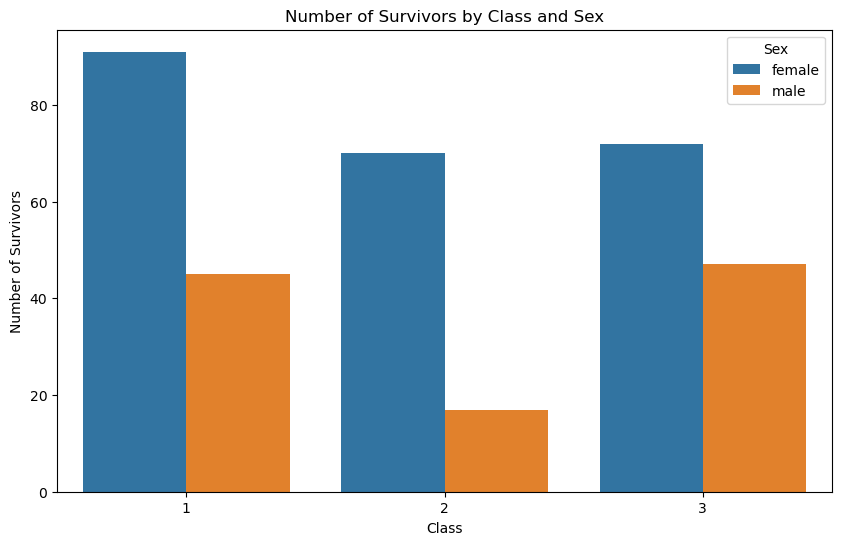

In [126]:
# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Pclass', y='Survived_Count_Class', hue='Sex', data=class_sex_survived)

# Customize the plot
plt.title('Number of Survivors by Class and Sex')
plt.xlabel('Class')
plt.ylabel('Number of Survivors')
plt.legend(title='Sex', loc='upper right')  # Adjust legend position if needed

# Show the plot
plt.show()

### Number of Survivors by Class and Sex Plot Explanation
This chart shows Titanic survivor numbers by passenger class (1st, 2nd, 3rd) and sex.  

Key points:
Class mattered hugely: 1st class had the most survivors, 2nd and 3rd class the fewest.
Gender was crucial: Women survived far more than men in all classes.
Combined effect: Being a 1st class woman gave the best survival odds; being a 2nd/3rd class man, the worst.
Even in 3rd class: Women still had better survival chances than men, showing "women and children first" even across classes.

Essentially, class and gender strongly impacted survival, with 1st class women prioritized, and 2nd class men least likely to survive.  The chart shows numbers of survivors, not rates (which would adjust for different group sizes).

### *Interpretation:* 

Passenger class (Pclass) is another important feature. 

This section analyzes how survival rates varied across different classes (1st, 2nd, and 3rd). 

The combined plot with sex provides further insight into how class and sex interacted to influence survival.


# Fare Analysis

In [130]:
# Print the minimum fare
print("Minimum Fare:", titanic_df['Fare'].min())

# Print the maximum fare
print("Maximum Fare:", titanic_df['Fare'].max())

Minimum Fare: 0.0
Maximum Fare: 512.3292


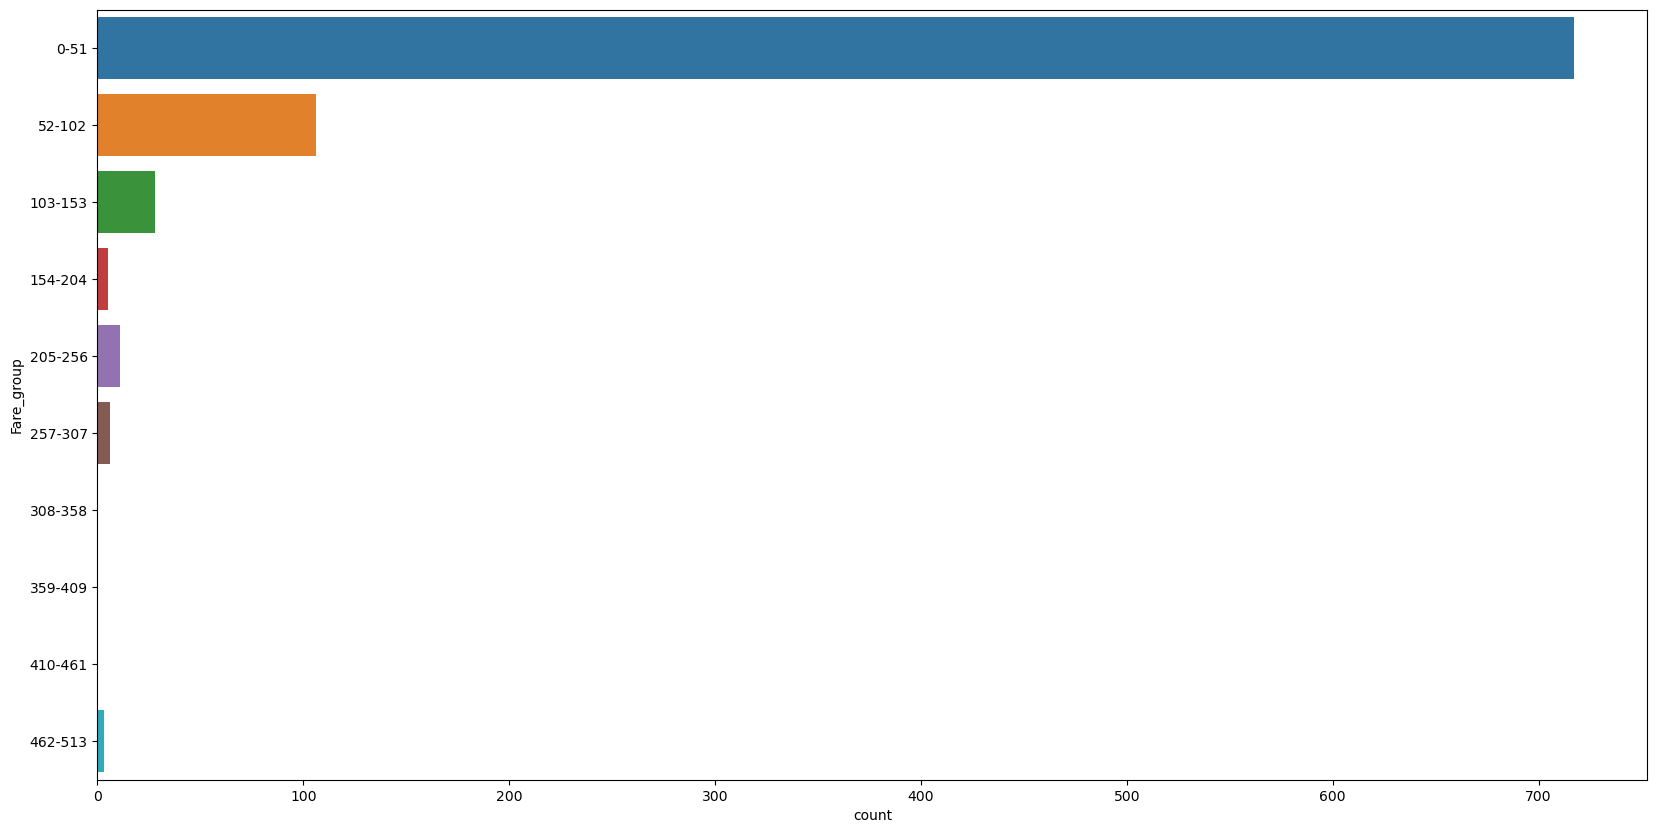

In [131]:
# Create Fare groups using pd.cut()
titanic_df['Fare_group'] = pd.cut(titanic_df['Fare'], 
                                [0, 51, 102, 153, 204, 256, 307, 358, 409, 461, 513], 
                                labels=['0-51', '52-102', '103-153', '154-204', '205-256', 
                                       '257-307', '308-358', '359-409', '410-461', '462-513'])

# Create a figure object with a specified size
fig = plt.figure(figsize=(20, 10)) 

# Create a countplot of the 'Fare_group' column
sns.countplot(y=titanic_df['Fare_group'], data=titanic_df);

In [132]:
# Group the DataFrame by 'Fare_group' and calculate the sum of 'Survived' for each group
survived_fare = titanic_df.groupby('Fare_group')['Survived'].sum()

# Print the results
print(survived_fare)

Fare_group
0-51       232
52-102      70
103-153     21
154-204      4
205-256      7
257-307      4
308-358      0
359-409      0
410-461      0
462-513      3
Name: Survived, dtype: int64


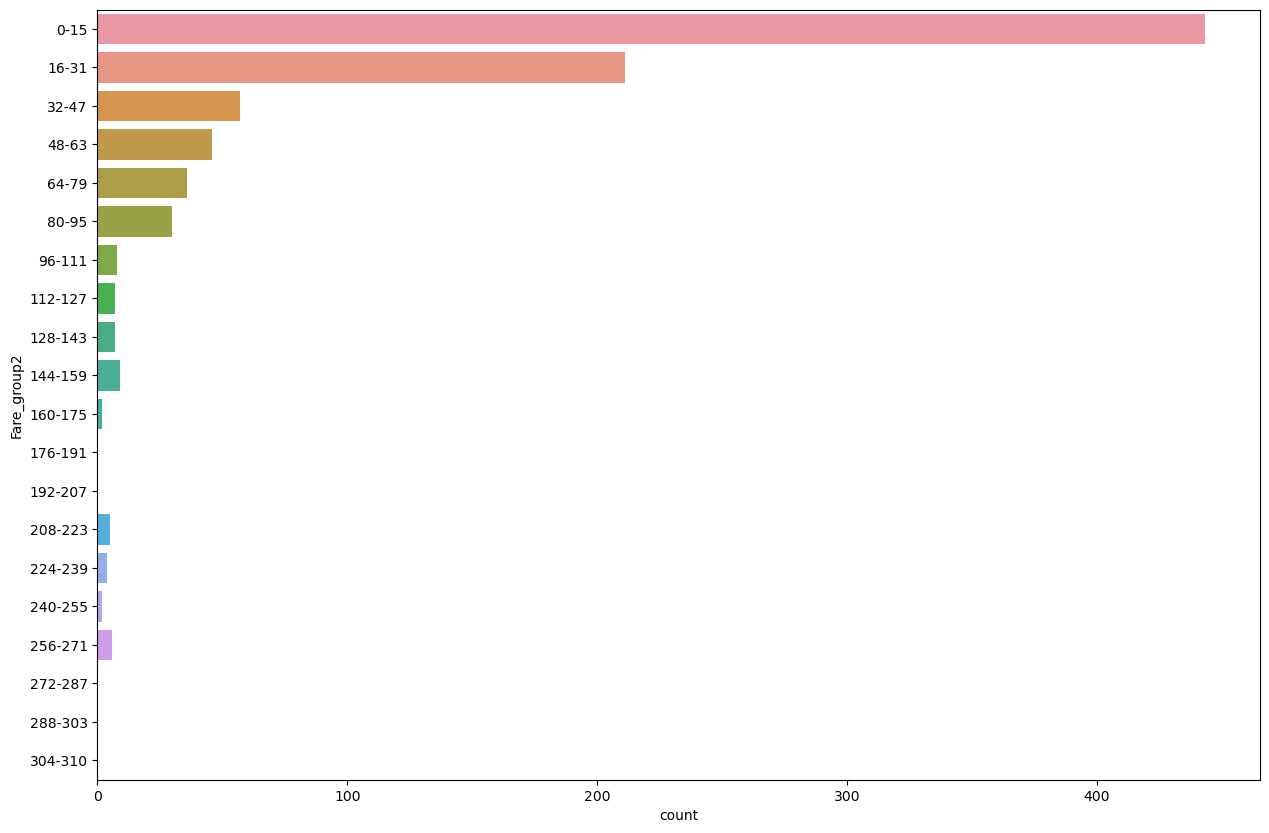

In [133]:
# Create new Fare groups with more ranges using pd.cut()
titanic_df['Fare_group2'] = pd.cut(titanic_df['Fare'], 
                                  [0,15,31,47,63,79,95,111,127,143,159,
                                   175,191,207,223,239,255,271,287,303,310],
                                  labels=['0-15','16-31','32-47','48-63','64-79','80-95','96-111','112-127','128-143','144-159',
                                         '160-175','176-191','192-207','208-223','224-239','240-255','256-271','272-287','288-303',
                                         '304-310'])

# Create a figure object with a specified size
fig = plt.figure(figsize=(15, 10)) 

# Create a countplot of the 'Fare_group2' column
sns.countplot(y=titanic_df['Fare_group2'], data=titanic_df);

In [134]:
# Group the DataFrame by 'Fare_group2' and calculate the sum of 'Survived' for each group
survived_fare = titanic_df.groupby('Fare_group2')['Survived'].sum()

# Print the results
print(survived_fare)

Fare_group2
0-15       113
16-31       99
32-47       18
48-63       29
64-79       19
80-95       24
96-111       5
112-127      6
128-143      6
144-159      6
160-175      2
176-191      0
192-207      0
208-223      3
224-239      3
240-255      1
256-271      4
272-287      0
288-303      0
304-310      0
Name: Survived, dtype: int64


In [135]:
# Group by 'Fare', 'Sex' and sum the 'Survived' column
fare_sex_survived = titanic_df.groupby(['Fare_group2', 'Sex'])['Survived'].sum().reset_index(name='Survived_Count_Fare')

# Print the grouped results
print(fare_sex_survived)

   Fare_group2     Sex  Survived_Count_Fare
0         0-15  female                   74
1         0-15    male                   39
2        16-31  female                   64
3        16-31    male                   35
4        32-47  female                   11
5        32-47    male                    7
6        48-63  female                   17
7        48-63    male                   12
8        64-79  female                   16
9        64-79    male                    3
10       80-95  female                   19
11       80-95    male                    5
12      96-111  female                    4
13      96-111    male                    1
14     112-127  female                    4
15     112-127    male                    2
16     128-143  female                    5
17     128-143    male                    1
18     144-159  female                    5
19     144-159    male                    1
20     160-175  female                    2
21     160-175    male          

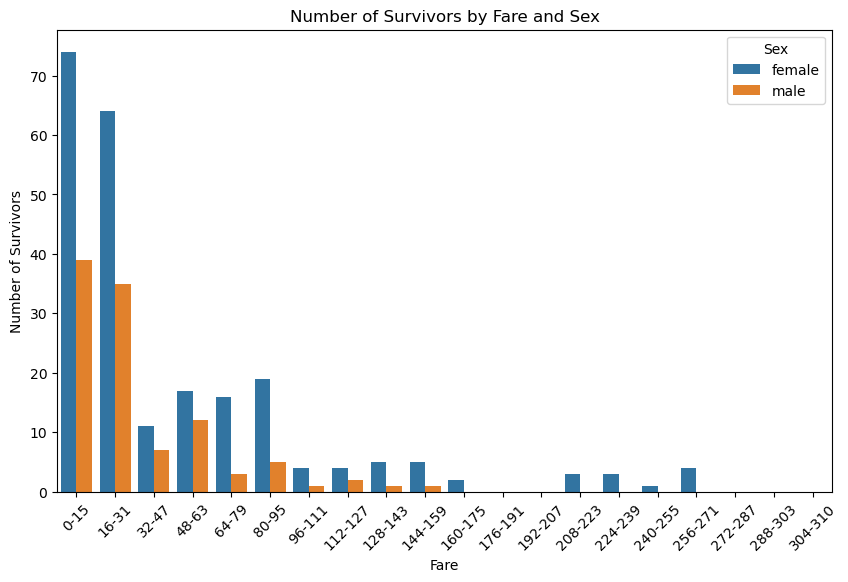

In [136]:
# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Fare_group2', y='Survived_Count_Fare', hue='Sex', data=fare_sex_survived)

# Customize the plot
plt.title('Number of Survivors by Fare and Sex')
plt.xlabel('Fare')
plt.ylabel('Number of Survivors')
plt.legend(title='Sex', loc='upper right')  # Adjust legend position if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Number of Survivors by Fare and Sex Plot Explanation

This chart shows Titanic survivors by fare paid (grouped) and sex.  

Key takeaways:
Lower fare = better survival: That is because many more People were paying less than higher fares with that it had much higher survival numbers.
Women survived more: This was true across almost all fare groups.
Lowest fare group disastrous: The cheapest tickets had by far the fewest survivors.

It shows numbers of survivors, not rates (which would be more accurate), but the trend is clear:  lower fare (and female) = more likely to live.

### *Interpretation:* 

This part of the code analyzes the relationship between fare paid and survival.  

Create fare groups to simplify the analysis of a continuous variable. 

The bar plot showing survival by fare group and sex helps to understand if passengers who paid lower fares had a better chance of survival, and how this might have differed between men and women.  

The x-axis label is made more descriptive and the labels are rotated to improve readability.


# Combined Analysis: Pclass and Age

In [140]:
# Group by 'Pclass', 'Age_Group' and sum the 'Survived' column
class_age_survived = titanic_df.groupby(['Age_group', 'Pclass'])['Survived'].sum().reset_index(name='Survived_Count_Class_Age')

# Print the grouped results
print(class_age_survived)

   Age_group  Pclass  Survived_Count_Class_Age
0        0-9       1                         2
1        0-9       2                        17
2        0-9       3                        19
3      10-19       1                        15
4      10-19       2                         9
5      10-19       3                        17
6      20-29       1                        24
7      20-29       2                        22
8      20-29       3                        31
9      30-39       1                        39
10     30-39       2                        19
11     30-39       3                        15
12     40-49       1                        22
13     40-49       2                        10
14     40-49       3                         2
15     50-59       1                        15
16     50-59       2                         5
17     50-59       3                         0
18     60-69       1                         4
19     60-69       2                         1
20     60-69 

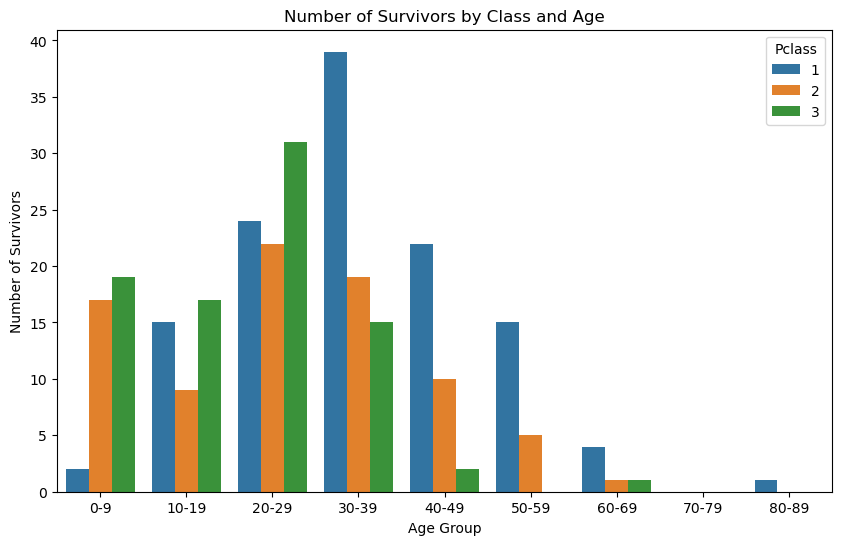

In [141]:
# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Age_group', y='Survived_Count_Class_Age', hue='Pclass', data=class_age_survived)

# Customize the plot
plt.title('Number of Survivors by Class and Age')
plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')
plt.legend(title='Pclass', loc='upper right')  # Adjust legend position if needed

# Show the plot
plt.show()

### Number of Survivors by Class and Age Plot Explanation

This chart shows Titanic survivors by age and passenger class.  

Key points:

1st class best: Especially young adults (20s-30s) in 1st class had the most survivors.
3rd class worst: Older 3rd class passengers had very low survival numbers.
Age matters too: Younger generally better, but class is a bigger factor.
Combined effect: Young, 1st class best chance; old, 3rd class worst.

### *Interpretation:* 

This section combines the analysis of age and passenger class. 

The bar plot visualizes how survival rates varied across different age groups *within* each passenger class. 

This helps to identify if, for example, younger passengers in first class had a higher survival rate than older passengers in third class.  


# Additional: Combined Analysis: Pclass and Age

In [188]:
# Group by 'Pclass', 'Fare_Group' and sum the 'Survived' column
class_fare_survived = titanic_df.groupby(['Fare_group', 'Pclass'])['Survived'].sum().reset_index(name='Survived_Count_Class_Fare')

# Print the grouped results
print(class_fare_survived)

   Fare_group  Pclass  Survived_Count_Class_Fare
0        0-51       1                         34
1        0-51       2                         85
2        0-51       3                        113
3      52-102       1                         63
4      52-102       2                          2
5      52-102       3                          5
6     103-153       1                         21
7     103-153       2                          0
8     103-153       3                          0
9     154-204       1                          4
10    154-204       2                          0
11    154-204       3                          0
12    205-256       1                          7
13    205-256       2                          0
14    205-256       3                          0
15    257-307       1                          4
16    257-307       2                          0
17    257-307       3                          0
18    308-358       1                          0
19    308-358       

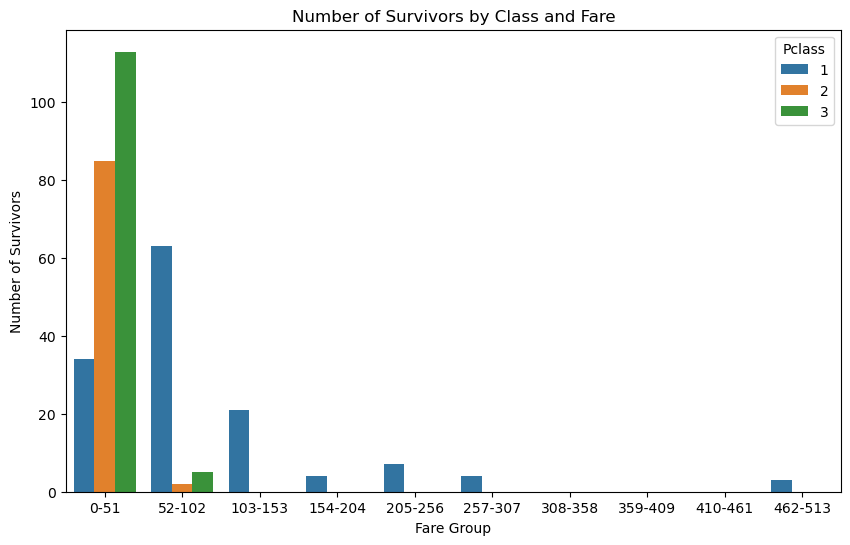

In [145]:
# Create a bar plot to visualize the results
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Fare_group', y='Survived_Count_Class_Fare', hue='Pclass', data=class_fare_survived)

# Customize the plot
plt.title('Number of Survivors by Class and Fare')
plt.xlabel('Fare Group')
plt.ylabel('Number of Survivors')
plt.legend(title='Pclass', loc='upper right')  # Adjust legend position if needed

# Show the plot
plt.show()

# Conclusion

The EDA performed in this notebook explores several key features of the Titanic dataset and their relationship to survival. We analyzed survival rates based on sex, age, passenger class, and fare. These visualizations and analyses provide insights into which groups of passengers were more likely to survive the Titanic disaster.

- What is the most important factor in determining survival of the Titanic
incident?

Answer: The most important factor in determining survival was a combination of class and sex.
Class: First class passengers had higher survival numbers than those in second or third class. This suggests that access to resources (like lifeboats) and preferential treatment played a crucial role.
Sex:  Across all classes and age groups, females had much higher survival numbers than males.

Therefore, while age and fare contributed, being female and in a higher class were the most influential factors in determining survival on the Titanic.

- In the movie, the upper-class passengers were given preference on
lifeboats. Does this show in the data?

Answer: Yes, the data supports the portrayal in the movie that upper-class passengers were given preference on lifeboats. Followed by 3rd class, and lastly 2nd class.

- “Women and children first”. Was this the case?

Answer: Yes, while the data provides strong support for the general principle of "women and children first" being a significant factor in survival on the Titanic, it's crucial to acknowledge that it wasn't an absolute rule and that other factors, such as class, also played a substantial role, as some men also survived.

- Add one other observation that you have noted in the dataset.

Cabin variable: Exploring the relationship between cabin location and survival could be very interesting. But this require some data cleaning to handle the huge missing cabin values.

Age variable: Although the Age varible has a lot of missing data, it is still a very important variable that could not be discarded. 